In [52]:
# importing packages
import numpy as np
import pandas as pd
import sqlite3
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
#retrieving dataframes
%store -r gross
%store -r info
%store -r reviews
%store -r tmdb
%store -r budgets
%store -r movie_basics
%store -r movie_ratings
%store -r movie_genres

In [54]:
movie_genres

,movie_id,genre,table_match
0,63540,NaN,movie_basics
1,66787,NaN,movie_basics
2,69049,Drama,movie_basics
3,69204,NaN,movie_basics
4,100275,NaN,movie_basics
...,...,...,...
47827,381231,Action and Adventure,tmdb
47829,366854,Kids and Family,tmdb
47830,366854,Action and Adventure,tmdb
47832,309885,Mystery and Suspense,tmdb


In [55]:
#Selecting only rows where table_match = movie_basics
mbg= movie_genres.loc[(movie_genres.table_match == "movie_basics")]
mbg

,movie_id,genre,table_match
0,63540,NaN,movie_basics
1,66787,NaN,movie_basics
2,69049,Drama,movie_basics
3,69204,NaN,movie_basics
4,100275,NaN,movie_basics
...,...,...,...
146139,9916538,Drama,movie_basics
146140,9916622,Documentary,movie_basics
146141,9916706,Comedy,movie_basics
146142,9916730,NaN,movie_basics


In [56]:
#combining movie_basics with movie_reviews
movieBasicRating = movie_basics.merge(movie_ratings, on = 'movie_id')
movieBasicRating

,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes
0,63540,Sunghursh,Sunghursh,2013,175.0,7.0,77
1,66787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43
2,69049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,6.9,4517
3,69204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,6.1,13
4,100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,6.5,119
...,...,...,...,...,...,...,...
73851,9913084,Diabolik sono io,Diabolik sono io,2019,75.0,6.2,6
73852,9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,8.7,136
73853,9914642,Albatross,Albatross,2017,NaN,8.5,8
73854,9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,6.6,5


In [57]:
#combining the movieBasicsGenres table with movieBasicRating table
movieBasicsGenres = mbg.merge(movieBasicRating, on = 'movie_id')
movieBasicsGenres

,movie_id,genre,table_match,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes
0,63540,NaN,movie_basics,Sunghursh,Sunghursh,2013,175.0,7.0,77
1,66787,NaN,movie_basics,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43
2,69049,Drama,movie_basics,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,6.9,4517
3,69204,NaN,movie_basics,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,6.1,13
4,100275,NaN,movie_basics,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,9913084,Documentary,movie_basics,Diabolik sono io,Diabolik sono io,2019,75.0,6.2,6
73852,9914286,NaN,movie_basics,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,8.7,136
73853,9914642,Documentary,movie_basics,Albatross,Albatross,2017,NaN,8.5,8
73854,9914942,NaN,movie_basics,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,6.6,5


In [58]:
#dropping unwanted columns 
genreRankings = movieBasicsGenres[['movie_id', 'genre', 'primary_title', 'averagerating', 'numvotes']]
genreRankings

#drop rows where genre is null 
gR = genreRankings.dropna()
gR.value_counts('genre')


genre
Drama                          11612
Documentary                    10313
Comedy                          5613
Horror                          2692
Mystery and Suspense            2012
Action and Adventure            1202
Romance                          717
Kids and Family                  491
Science Fiction and Fantasy      442
Animation                        348
Music                            308
Biography                        163
History                          106
Sports and Fitness                88
Western                           75
TV Show                           10
dtype: int64

In [59]:
#getting the average rating of movies in each genre
gRGrouped = gR.groupby('genre').mean().reset_index()
gRGrouped

#deleting unwanted columns 
gRg = gRGrouped[['genre', 'averagerating']]

#changing column name 
rating = gRg.rename(columns ={"averagerating":"averageRatingPerGenre"})
rating

,genre,averageRatingPerGenre
0,Action and Adventure,5.847837
1,Animation,5.908621
2,Biography,6.858896
3,Comedy,5.777998
4,Documentary,7.293794
5,Drama,6.494265
6,History,6.605660
7,Horror,4.835475
8,Kids and Family,6.078004
9,Music,7.241558


In [60]:
#getting the count of movies in each genre
gRCount =gR.groupby('genre').count().reset_index()
gRCount

#dropping unnecessary columns 
gRc = gRCount[['genre', 'movie_id']]
gRc

#changing column name 
count = gRc.rename(columns ={"movie_id":"count"})
count

,genre,count
0,Action and Adventure,1202
1,Animation,348
2,Biography,163
3,Comedy,5613
4,Documentary,10313
5,Drama,11612
6,History,106
7,Horror,2692
8,Kids and Family,491
9,Music,308


In [61]:
#combining table with average rating and count per genre
genreRat = count.merge(rating, on = 'genre')
genreRat


,genre,count,averageRatingPerGenre
0,Action and Adventure,1202,5.847837
1,Animation,348,5.908621
2,Biography,163,6.858896
3,Comedy,5613,5.777998
4,Documentary,10313,7.293794
5,Drama,11612,6.494265
6,History,106,6.605660
7,Horror,2692,4.835475
8,Kids and Family,491,6.078004
9,Music,308,7.241558


In [62]:
genreRatingCount = genreRat.rename(columns ={"genre":"Genre"})
genreRatingCount

,Genre,count,averageRatingPerGenre
0,Action and Adventure,1202,5.847837
1,Animation,348,5.908621
2,Biography,163,6.858896
3,Comedy,5613,5.777998
4,Documentary,10313,7.293794
5,Drama,11612,6.494265
6,History,106,6.605660
7,Horror,2692,4.835475
8,Kids and Family,491,6.078004
9,Music,308,7.241558


In [63]:
####Showing all Genres 

<AxesSubplot:xlabel='averageRatingPerGenre', ylabel='count'>

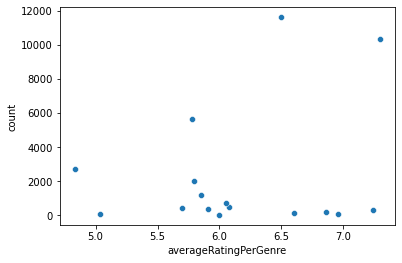

In [64]:
#creating a scatterplot of all genres
sns.scatterplot(data=genreRatingCount, x='averageRatingPerGenre', y='count')

In [65]:
######Showing genres with average score > 6.5 and count < 350

In [66]:
#creating a scatterplot when average ratings are > 6.5

#filtering movies with rating > 6 .5
filter = genreRatingCount['averageRatingPerGenre'] > 6.5
topRankings= genreRatingCount[filter]
print(topRankings)



                 Genre  count  averageRatingPerGenre
2            Biography    163               6.858896
4          Documentary  10313               7.293794
6              History    106               6.605660
9                Music    308               7.241558
13  Sports and Fitness     88               6.956818


In [67]:
#filtering movies with count < 10000
filt = topRankings['count']< 350
topGenres =topRankings[filt]
print(topGenres)


                 Genre  count  averageRatingPerGenre
2            Biography    163               6.858896
6              History    106               6.605660
9                Music    308               7.241558
13  Sports and Fitness     88               6.956818


[Text(0.5, 0, 'Average Rating of Movie'),
 Text(0, 0.5, 'Number of Movies'),
 Text(0.5, 1.0, ' Genre Analysis ')]

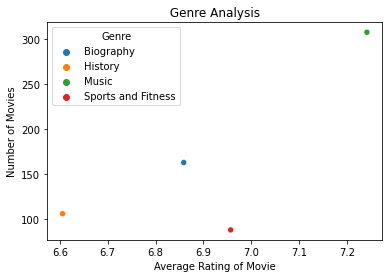

In [79]:
#creating a scatterplot of the top 5 genres
ax = sns.scatterplot(data=topGenres,
                x='averageRatingPerGenre',
                y='count', 
                hue = 'Genre')

ax.set(xlabel = "Average Rating of Movie",
      ylabel = "Number of Movies",
      title = " Genre Analysis ")